In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import utils
import os
import tensorflow as tf
import pandas as pd
import networkx as nx
import random as rn

In [2]:
SEED = 123
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
np.random.seed(SEED)
rn.seed(SEED)

In [87]:
data = np.load(os.path.join('..','data','royalty.npz'))

RULE = 'spouse'
TRACE_LENGTH = 1

pred_data = np.load(os.path.join('..','data','preds','explaine'+'_'+RULE+'_preds.npz'),allow_pickle=True)

triples,traces,nopred,entities,relations = utils.get_data(data,RULE)

NUM_ENTITIES = len(entities)
NUM_RELATIONS = len(relations)

ent2idx = dict(zip(entities, range(NUM_ENTITIES)))
rel2idx = dict(zip(relations, range(NUM_RELATIONS)))

idx2ent = dict(zip(range(NUM_ENTITIES),entities))
idx2rel = dict(zip(range(NUM_RELATIONS),relations))

pred_traces = utils.idx2array(pred_data['preds'],idx2ent,idx2rel)

In [88]:
true_triples = triples[pred_data['test_idx']]
true_traces = traces[pred_data['test_idx']][:,0:TRACE_LENGTH,:]

In [89]:
jaccard = []
for i in range(pred_traces.shape[0]):
    jaccard.append(utils.jaccard_score(pred_traces[i],true_traces[i]))
error_idx = np.array(jaccard) < 1

In [90]:
counts = {}

for pred in pred_traces[error_idx]:
    
    for triple in pred:
        if triple[1] in counts:
            counts[triple[1]] += 1
        else:
            counts[triple[1]] = 1
            
sorted_counts = sorted(counts.items(), key=lambda x:x[1],reverse=True)
keys = [tup[0] for tup in sorted_counts]
values = [tup[1] for tup in sorted_counts]

/opt/anaconda3/envs/base_local/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


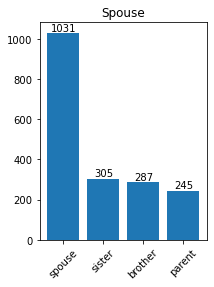

In [103]:
fig, ax = plt.subplots(figsize=(3,4))
ax.bar(keys,values)
ax.set_title(RULE.capitalize())
rects = ax.patches
count_labels = [str(v) for v in values]
ax.set_xticklabels(labels=keys,rotation = (45), fontsize = 10)

for rect, label in zip(rects,count_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, 
            height,label,ha='center',va='bottom')
plt.show()
#plt.savefig(f"../data/plots/{RULE}_counts.pdf",bbox_inches='tight')

In [15]:
# if MODEL == 'gnn_explainer':
    
#     pred_traces = []
#     for i in range(len(pred_data['preds'])):

#         preds_i = []

#         for rel_idx in range(NUM_RELATIONS):

#             triples_i = pred_data['preds'][i][rel_idx]

#             if triples_i.shape[0]:
#                 rel_indices = (np.ones((triples_i.shape[0],1)) * rel_idx).astype(np.int64)
#                 concat = np.concatenate([triples_i,rel_indices],axis=1)
#                 preds_i.append(concat[:,[0,2,1]])
#         preds_i = np.concatenate(preds_i,axis=0)
#         pred_traces.append(utils.idx2array(preds_i,idx2ent,idx2rel))
        
#         if i == 10:
#             break

#     pred_traces = np.array(pred_traces,dtype=object)
    
# elif MODEL == 'explaine':
#     pred_traces = utils.idx2array(pred_data['preds'],idx2ent,idx2rel)
    
# true_triples = triples[pred_data['test_idx']]
# true_traces = traces[pred_data['test_idx']][:,0:TRACE_LENGTH,:]

In [ ]:
# indicator = []
# counts = {}

# for pred in pred_traces[error_idx]:
    
#     for triple in pred:
#         if triple[1] in counts:
#             counts[triple[1]] += 1
#         else:
#             counts[triple[1]] = 1

In [ ]:
RULE = 'predecessor'
TRACE_LENGTH = 1
MODEL = 'explaine'
data = np.load(os.path.join('..','data','royalty.npz'))

triples,traces,nopred,entities,relations = utils.get_data(data,RULE)

NUM_ENTITIES = len(entities)
NUM_RELATIONS = len(relations)

ent2idx = dict(zip(entities, range(NUM_ENTITIES)))
rel2idx = dict(zip(relations, range(NUM_RELATIONS)))

idx2ent = dict(zip(range(NUM_ENTITIES),entities))
idx2rel = dict(zip(range(NUM_RELATIONS),relations))

In [ ]:
explaine_data = np.load(os.path.join('..','data','preds','explaine'+'_'+RULE+'_preds.npz'),allow_pickle=True)
gnn_data = np.load(os.path.join('..','data','preds','gnn_explainer'+'_'+RULE+'_preds.npz'),allow_pickle=True)

gnn_traces = []
for i in range(len(gnn_data['preds'])):

    preds_i = []

    for rel_idx in range(NUM_RELATIONS):

        triples_i = gnn_data['preds'][i][rel_idx]

        if triples_i.shape[0]:
            rel_indices = (np.ones((triples_i.shape[0],1)) * rel_idx).astype(np.int64)
            concat = np.concatenate([triples_i,rel_indices],axis=1)
            preds_i.append(concat[:,[0,2,1]])
    preds_i = np.concatenate(preds_i,axis=0)
    gnn_traces.append(utils.idx2array(preds_i,idx2ent,idx2rel))

    if i == 10:
        break

gnn_traces = np.array(gnn_traces,dtype=object)

explaine_traces = utils.idx2array(explaine_data['preds'][0:10],idx2ent,idx2rel)

true_triples = triples[explaine_data['test_idx']]
true_traces = traces[explaine_data['test_idx']][:,0:TRACE_LENGTH,:]

i = 3

print(gnn_traces[i])
print()
print(traces[gnn_data['test_idx']][:,0:TRACE_LENGTH,:][i])
print()
print(explaine_traces[i])
plot_triples = np.concatenate([gnn_traces[i].reshape(-1,3),
                           true_traces[i],
                           explaine_traces[i]
                          ],axis=0)

In [ ]:
#plot_triples = utils.idx2array(adj_data,idx2ent,idx2rel)

label_dict = {}

for trip in plot_triples:
    
    head,rel,tail = trip
    
    label_dict[(head,tail)] = 'has' + rel.title()

plt.figure(figsize=(10,10))

G = nx.MultiDiGraph()
for triple in plot_triples:
    G.add_node(triple[0])
    G.add_node(triple[2])
    G.add_edge(triple[0],triple[2])
    
ground_truth = np.concatenate([true_triples[i].reshape(-1,3),true_traces[i]],axis=0)

gt_entities = np.unique(np.concatenate([ground_truth[:,0],ground_truth[:,2]]))

node_sizes = [1200 if ent in gt_entities else 300 for ent in G.nodes() ]

pos = nx.spring_layout(G,seed=SEED,k=5/np.sqrt(G.order()))

nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
        node_size=node_sizes, node_color='skyblue', alpha=0.9,font_size=12,
        labels={node: node for node in G.nodes()})
nx.draw_networkx_edge_labels(G,pos,
                             edge_labels=label_dict,
                             font_color='black',
                             font_size=10)

ax = plt.gca()
ax.margins(0.25)
plt.axis("off")

In [ ]:
pred_data = np.load(os.path.join('..','data','preds',MODEL+'_'+RULE+'_preds.npz'),allow_pickle=True)
# error_data = np.load(
#     os.path.join('..','data','other',MODEL +'-error',MODEL+'_'+RULE+'.npz'),
#     allow_pickle=True)['x']

In [ ]:
#predicate of the correct explanation triples that is most frequently missing 

In [ ]:
# full_graph = np.concatenate([triples,traces.reshape(-1,3), nopred])

# kg_df = pd.DataFrame({'source':full_graph[:,0], 
#                       'target':full_graph[:,2], 
#                       'edge':full_graph[:,1]})
# G = nx.from_pandas_edgelist(kg_df, "source", "target",
#                           edge_attr=True, create_using=nx.MultiDiGraph())
# degrees = {node:val for (node, val) in G.degree()}
# def neighbors(G, node, n):
#     path_lengths = nx.single_source_dijkstra_path_length(G, node)
#     return [node for node, length in path_lengths.items()
#                     if length == n]

In [ ]:
jaccard = []
for i in range(pred_traces.shape[0]):
    jaccard.append(utils.jaccard_score(pred_traces[i],true_traces[i]))
error_idx = np.array(jaccard) < 1

In [ ]:
indicator = []
counts = {}

for pred in pred_traces[error_idx]:
    
    for triple in pred:
        if triple[1] in counts:
            counts[triple[1]] += 1
        else:
            counts[triple[1]] = 1
#     indicator_i = 0.0
#     for predicate in list(true_traces[:,:,1][0]):
        
#         for p,v in counts.items():
            
#             if predicate == p and v >= 1:
                
#                 indicator_i += 1
                
#     if indicator_i >= len(list(true_traces[:,:,1][0])):
#         indicator.append(1)
                
# print(1-sum(indicator) / len(pred_traces[error_idx]))

In [ ]:
plt.bar(list(counts.keys()), counts.values())

In [ ]:
num_errors = len(pred_traces[error_idx])

for predicate in list(true_traces[:,:,1][0]):
    
    percent = (np.sum(
        pred_traces[error_idx][:,:,1] != predicate,
        axis=1) >= 1).sum() / num_errors
    
    print(f"{predicate} missing from {round(percent*100)}% of errors ")

In [ ]:
# neighbors_list = neighbors(G, 'Abbas_II_of_Egypt', 1)

# degree_list = [degrees[neighbor] for neighbor in neighbors_list]

# np.mean(degree_list)

In [ ]:
# def avg_degree(traces,degrees):
    
#     head_total = 0.0
#     tail_total = 0.0
    
#     num_traces = len(traces)
    
#     for i in range(num_traces):

#         head_triple_total = 0.0
#         tail_triple_total = 0.0
        
#         for trip in traces[i]:

#             head_triple_total += degrees[trip[0]]

#             tail_triple_total += degrees[trip[2]]
            
#         trace_length = traces[i].shape[0]

#         head_triple_total /= trace_length
#         tail_triple_total /= trace_length

#         head_total += head_triple_total
#         tail_total += tail_triple_total

#     head_total /= num_traces
#     tail_total /= num_traces
    
#     return head_total, tail_total

In [ ]:
# if RULE == 'spouse' and MODEL == 'explaine':
#     error_data = error_data[1:]
#look at explaine trace=1 preds

# most_common_predicates, mcp_count = np.unique(error_data[0][0],return_counts=True)

# most_common_predicate = most_common_predicates[np.argmax(mcp_count)]

# error_counts = 0

# for tup in error_data:

#     predicates, counts = np.unique(tup[0],return_counts=True)

#     predicates = list(predicates)

#     if most_common_predicate in predicates:
    
#         current_count = counts[predicates.index(most_common_predicate)]
#         #if current_count >= TRACE_LENGTH:
#         error_counts += tup[1]

# #print(f'{most_common_predicate} appears in {error_counts} of predicted triples')
# #print(f'percentage {error_counts / true_traces.shape[0]}')
# print(f'{MODEL}-{RULE}, most frequent predicate {most_common_predicate} occurs in {error_counts * 100 / true_traces.shape[0]}% of triples')

In [ ]:
# for i in pred_traces:
#     print(np.array(triples)[:,1])

# ce = .99
# pwce = .01

# ce + pwce + pwce*(1-ce) + (1-pwce)*ce

In [ ]:
jaccard = []
for i in range(pred_traces.shape[0]):
    jaccard.append(utils.jaccard_score(pred_traces[i],true_traces[i]))
jaccard_idx = np.array(jaccard) < 1

In [ ]:
if RULE == 'spouse' and MODEL == 'explaine':
    
    errors = pred_traces[jaccard_idx]
    
    #idx = np.argwhere(errors[:,0,:][:,1] == 'spouse')[-2]
    
    idx = np.argwhere((np.array(jaccard) < 1) & (pred_traces[:,0,:][:,1] == 'spouse'))[-25]

    print(true_triples[idx])
    print(true_traces[idx])
    print(pred_traces[idx])

In [ ]:
d = {}
for i in pred_traces[jaccard_idx][:,:,1]:
    
    tup = tuple(i)
    
    for predicate in tup:
        
        if predicate in d:
            d[predicate] += 1
        else:
            d[predicate] = 1

In [ ]:
#When looking at the explanations the frequency of (hasParent,hasGrandparent) may not be the 
#same as the frequency of the predicate hasGrandparent in the explanations has you may 
#have (hasParent,hasGrandparent) (hasSister,hasGrandparent) .... i.e. ( ? ,hasGrandparent) 
#and (hasGrandparent, ? ) I suggest that for both methods you report the most frequent erroneous 
#predicate in the explanations e.g. hasAunt appears in X% of the explanations of hasAunt

In [ ]:
sorted_counts = sorted(d.items(),key=lambda key:key[1],reverse=True)

percentage = round(100*sorted_counts[0][1] / sum(d.values()))

print(f"of incorrect predictions {sorted_counts[0][0]} was used in {percentage}% of triples")

In [ ]:
# avg=0
# for i in range(len(gnn_preds)):
#     avg += gnn_preds[i].shape[0]
# print(avg/len(gnn_preds))

#avg cardinality
#spouse: 10.416500597847747
#uncle 54.39667705088266
#aunt: 56.02489905787348
#successor: 12.638145315487572
#predecessor: 12.2868068833652
#grandparent: 36.384018619084564

In [ ]:
# counts = []
# for i in range(len(gnn_preds)):
#     counts.append(gnn_preds[i].shape[0])

In [ ]:
# print(min(counts))
# print(max(counts))
#min/max
#spouse: 2/119
#uncle: 8/215
#aunt: 8/202
#successor: 2/238
#predecessor: 2/149
#grandparent: 

In [ ]:
# spouse_total = 305 + 287 + 287
# 305 / spouse_total

In [ ]:
# uncle_total = 422 + 225 + 224 + 208 + 205 + 204 + 195 + 170 + 169 + 161 + 150 + 137 + 103 + 81
# 422 / uncle_total

In [ ]:
# aunt_total = 341 + 262 + 247 + 234 + 226 + 225 + 207 + 182 + 181 + 157 + 154 + 148 + 118 + 61
# 341 / aunt_total

In [ ]:
# successor_total = 830 + 197 + 139 + 137
# 830 / successor_total

In [ ]:
# predecessor_total = 834 + 178 + 150 + 119
# 834 / predecessor_total

In [ ]:
# grandparent_total = 236 + 223 + 220 + 207 + 200 + 200 + 174 + 143 + 142 + 132 + 126 + 126+123 +108+105
# 236 / grandparent_total

In [ ]:
# gnn_spouse = 2509 - 399
# 244 / gnn_spouse

In [ ]:
#np.load('/Users/nhalliwe/Desktop/test.npz',allow_pickle=True)

In [ ]:
# print(uniq)
# print(counts)

In [ ]:
# print('gnn uncle', 34 / 2889 )
# print('gnn aunt',58 /2972)

In [ ]:
#print('gnn successor', 347 / 2092)

In [ ]:
# print('gnn predecessor',342/2092)
# print('gnn grandparent',15/2578)

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import utils
import random as rn
import tensorflow as tf

In [ ]:
SEED = 123
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
np.random.seed(SEED)
rn.seed(SEED)

data = np.load(os.path.join('..','data','royalty.npz'))

RULE = 'aunt'
TRACE_LENGTH = 2

NUM_ENTITIES = len(entities)
NUM_RELATIONS = len(relations)

ent2idx = dict(zip(entities, range(NUM_ENTITIES)))
rel2idx = dict(zip(relations, range(NUM_RELATIONS)))

idx2ent = dict(zip(range(NUM_ENTITIES),entities))
idx2rel = dict(zip(range(NUM_RELATIONS),relations))

triples,traces,nopred,entities,relations = utils.get_data(data,RULE)

i = 7274

In [ ]:
adj_data = np.concatenate([triples,traces[:,0:TRACE_LENGTH,:].reshape(-1,3)],axis=0)

adj_data_sparse = utils.array2idx(adj_data,ent2idx,rel2idx)

adj_mats = utils.get_adj_mats(
    data=adj_data_sparse,
    num_entities=NUM_ENTITIES,
    num_relations=NUM_RELATIONS
)

In [ ]:
head = triples[i][0]
tail = triples[i][2]

head_idx = ent2idx[head]
tail_idx = ent2idx[tail]

neighbor_indices = []

for rel_idx in range(NUM_RELATIONS):

    dense_mat = tf.sparse.to_dense(adj_mats[rel_idx]).numpy()[0]

    head_neighbors = np.argwhere(dense_mat[head_idx,:]).flatten()
    tail_neighbors = np.argwhere(dense_mat[:,tail_idx]).flatten()
    
    head_triples = [(head_idx,rel_idx,t_idx) for t_idx in head_neighbors]
    tail_triples = [(h_idx,rel_idx,tail_idx) for h_idx in tail_neighbors]
    
    if head_triples:
        neighbor_indices.append(head_triples)
    if tail_triples:
        neighbor_indices.append(tail_triples)

In [ ]:
#neighbors = [idx2ent[idx] for idx in neighbor_indices]

In [ ]:
plot_triples = utils.idx2array(np.concatenate(neighbor_indices,axis=0),idx2ent,idx2rel)[5:]

In [ ]:
# clean_plot_triples = []

# for trip in plot_triples:
#     head,rel,tail = trip
#     if head == 'Maria_Theresa_of_Austria-Este_(1849–1919)>':
#         head = head[0:-18]
#     clean_plot_triples.append([head,rel,tail])

In [ ]:
# plot_triples = np.concatenate([triples[i].reshape(1,3),traces[i].reshape(-1,3)], axis=0)
# plot_triples = plot_triples[0:-1,:]

# label_dict = {('Princess_Clémentine_of_Belgium','Archduchess_Hermine_of_Austria'):'hasAunt',
# ('Marie_Henriette_of_Austria','Archduchess_Hermine_of_Austria'):'hasSister',
# ('Princess_Clémentine_of_Belgium','Marie_Henriette_of_Austria'):'hasParent'}
label_dict = {}

for trip in plot_triples:
    
    head,rel,tail = trip
    
    label_dict [(head,tail)] = 'has' + rel.title()

In [ ]:
plt.figure(figsize=(10,10))

G = nx.MultiDiGraph()
for triple in plot_triples:
    G.add_node(triple[0])
    G.add_node(triple[2])
    G.add_edge(triple[0], triple[2])
    
ground_truth = np.concatenate([triples[i].reshape(-1,3),traces[i]],axis=0)[0:-1]

gt_entities = np.unique(np.concatenate([ground_truth[:,0],ground_truth[:,2]]))

node_sizes = [1200 if ent in gt_entities else 300 for ent in G.nodes() ]

pos = nx.spring_layout(G,seed=SEED,k=10)

nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
        node_size=node_sizes, node_color='skyblue', alpha=0.9,font_size=12,
        labels={node: node for node in G.nodes()})

nx.draw_networkx_edge_labels(G,pos,edge_labels=label_dict,font_color='black',font_size=10)

ax = plt.gca()
ax.margins(0.25)
plt.axis("off")